#### importing the necessary packages

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


###### column explanation

In [77]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


###### data preprocessing 

In [78]:
data.shape # 1025 rows and 14 columns

(1025, 14)

###### checking missing values

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [80]:
# checking for any missing values

data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

####  Exploratary Data Analysis (EDA)

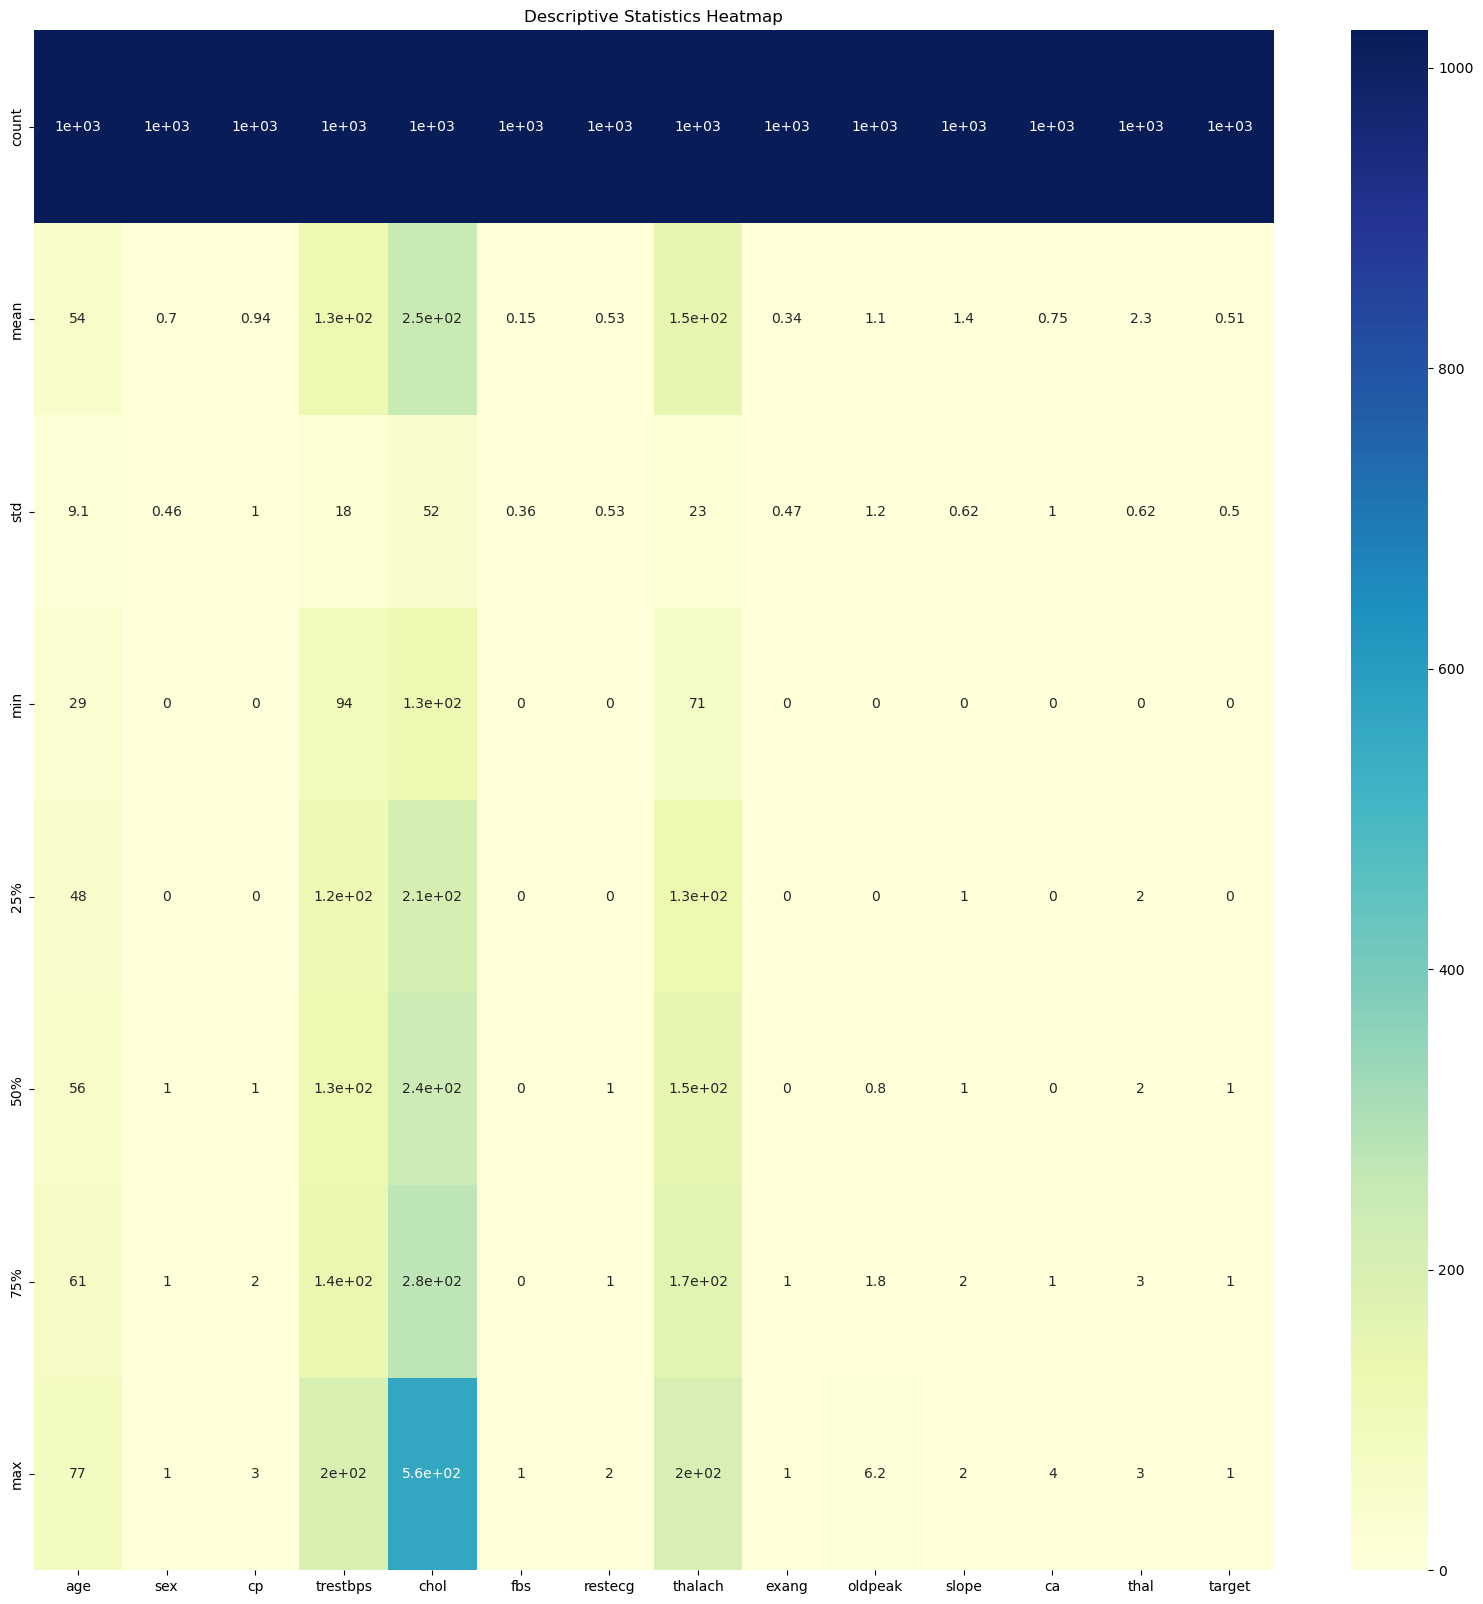

In [83]:
# Assuming 'data' is your DataFrame
data_stats = data.describe()

plt.figure(figsize=(20, 20))
sns.heatmap(data_stats, annot=True, cmap='YlGnBu')
plt.title('Descriptive Statistics Heatmap')
plt.show()


In [9]:
data["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

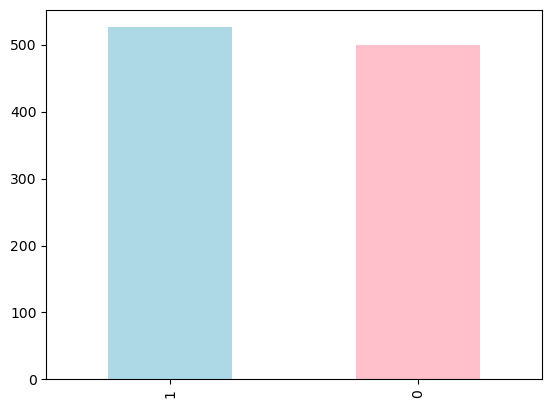

In [10]:
data['target'].value_counts().plot(kind="bar", color=['lightblue', 'pink']);

##### Correlation Matrix

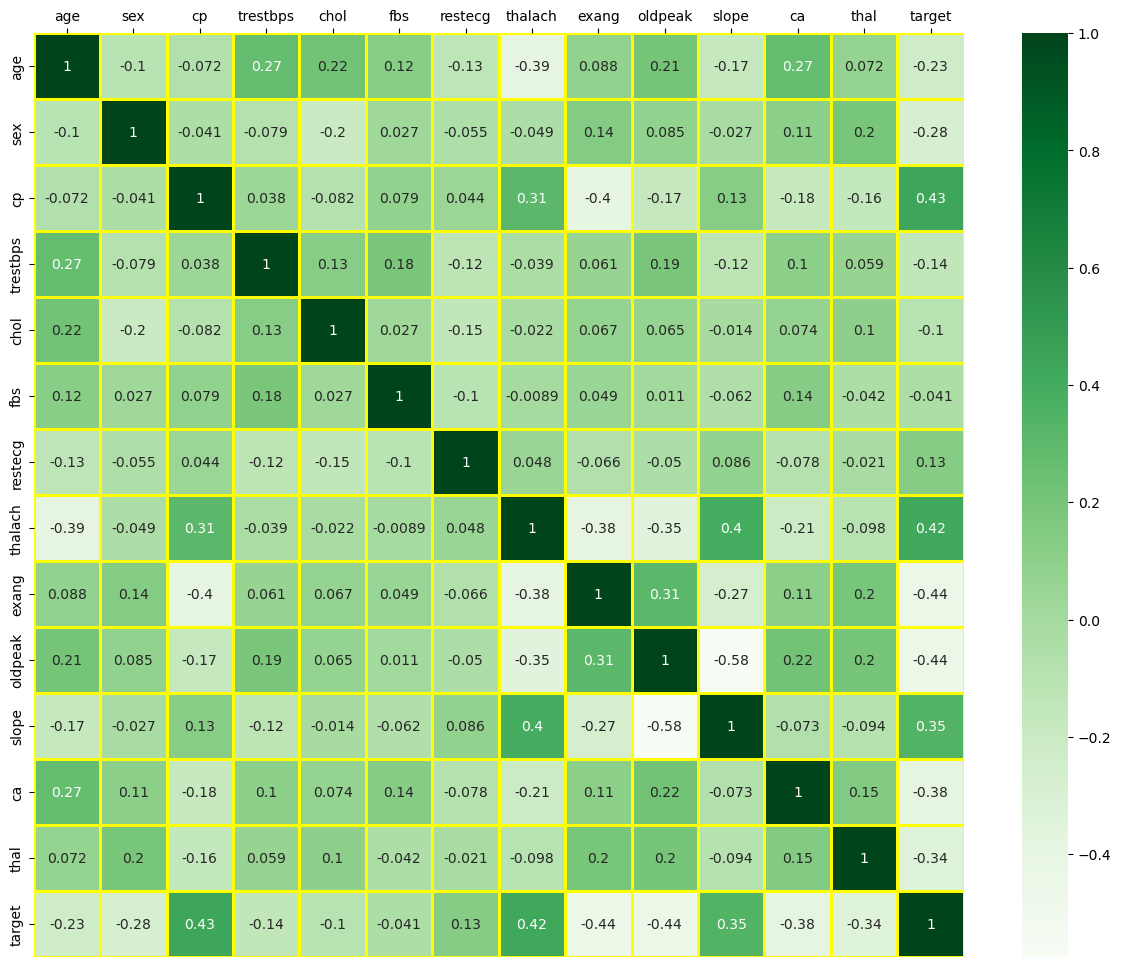

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize = (15, 12))
ax = sns.heatmap(data.corr(), linewidth=1,linecolor = "yellow" , annot=True, cmap="Greens")
ax.xaxis.tick_top()


plt.show()
plt.savefig('correlationfigure')

In [12]:
'''
heat map explaination

Visulaizing the data features to find the correlation between them which will infer the important features.

Inference:

From the above heatmap, we can understand that Chest pain(cp) and target have a positive correlation.
    It means that whose has a large risk of chest pain results in a greater chance to have heart disease. 
    In addition to chest pain, thalach, slope, and resting have a positive correlation with the target.

Then, exercise-induced angina(exang) and the target have a negative correlation which means when we exercise, 
    the heart requires more blood, but narrowed arteries slow down the blood flow. In addition to ca, old peak,
    thal have a negative correlation with the target.

'''

'\nheat map explaination\n\nVisulaizing the data features to find the correlation between them which will infer the important features.\n\nInference:\n\nFrom the above heatmap, we can understand that Chest pain(cp) and target have a positive correlation.\n    It means that whose has a large risk of chest pain results in a greater chance to have heart disease. \n    In addition to chest pain, thalach, slope, and resting have a positive correlation with the target.\n\nThen, exercise-induced angina(exang) and the target have a negative correlation which means when we exercise, \n    the heart requires more blood, but narrowed arteries slow down the blood flow. In addition to ca, old peak,\n    thal have a negative correlation with the target.\n\n'

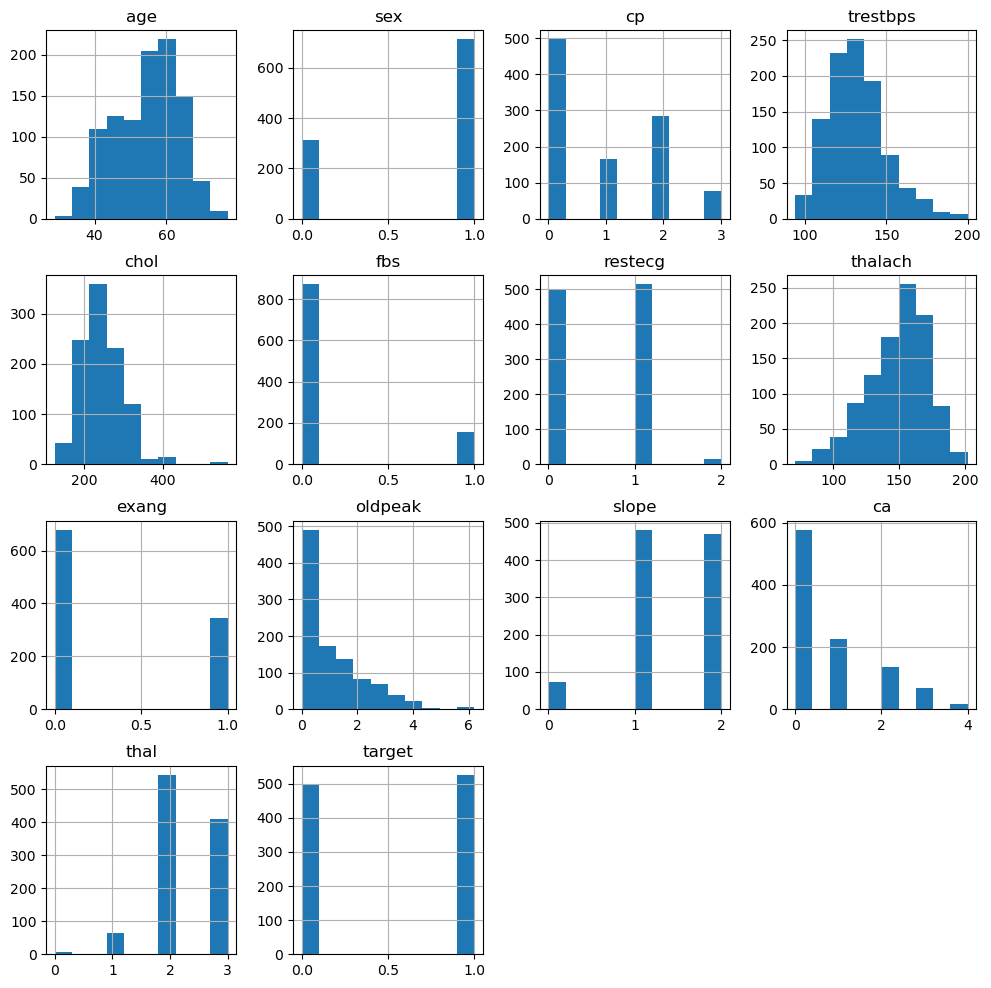

In [13]:
data.hist(figsize = (12,12))
plt.savefig('featuresplot')

### Heart disease frequency for ages

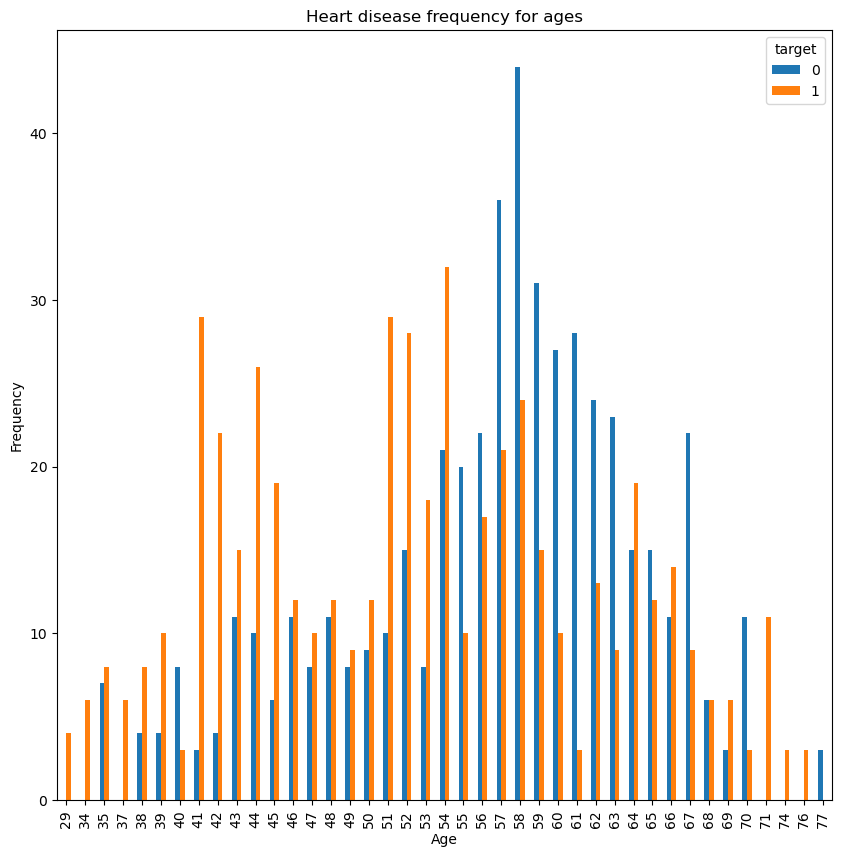

In [14]:
pd.crosstab(data.age, data.target).plot(kind='bar', figsize=(10,10))
plt.title('Heart disease frequency for ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

####  Heart Disease Frequency for male and female

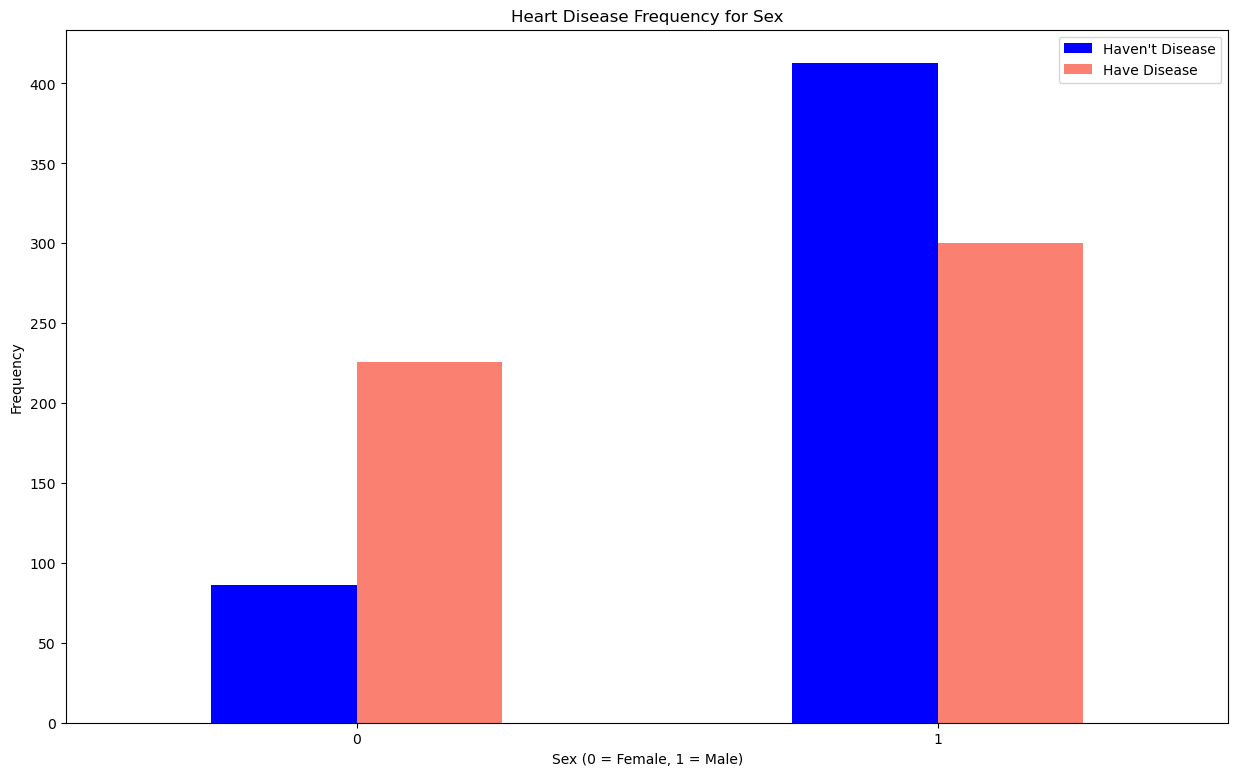

In [15]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,9),color=['blue','salmon' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

pred = data.drop("target", axis=1)
target = data["target"]
X_train, X_test, Y_train, Y_test = train_test_split(pred,target, test_size = 0.2, random_state = 0)

In [17]:
len(X_train)

820

In [18]:
len(X_test)

205

In [19]:
len(Y_train)

820

In [20]:
len(Y_test)

205

#### model fitting

#### * implementing knn classifier


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
# k value is square root of no of rows in train data
import math
k = math.sqrt(len(X_train))
k

28.635642126552707

In [23]:
k = 29 # no of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors = k)

# train the model
knn_classifier.fit(X_train, Y_train)

# make predictions
Y_pred = knn_classifier.predict(X_test)

#calculate accuracy

accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)

0.7658536585365854


In [24]:
# taking k values from 1 to 30
k_range = range(1, 30)
scores = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, Y_train)
    accuracy = model.score(X_test, Y_test)
    scores.append(accuracy)
    print('k=%d Accuracy = %.2f%%' % (k, accuracy*100))

k=1 Accuracy = 100.00%
k=2 Accuracy = 95.12%
k=3 Accuracy = 91.22%
k=4 Accuracy = 81.95%
k=5 Accuracy = 74.63%
k=6 Accuracy = 75.12%
k=7 Accuracy = 72.20%
k=8 Accuracy = 73.66%
k=9 Accuracy = 75.61%
k=10 Accuracy = 79.51%
k=11 Accuracy = 78.54%
k=12 Accuracy = 79.02%
k=13 Accuracy = 76.10%
k=14 Accuracy = 73.17%
k=15 Accuracy = 75.12%
k=16 Accuracy = 78.54%
k=17 Accuracy = 76.59%
k=18 Accuracy = 76.10%
k=19 Accuracy = 75.61%
k=20 Accuracy = 75.61%
k=21 Accuracy = 74.63%
k=22 Accuracy = 73.66%
k=23 Accuracy = 73.66%
k=24 Accuracy = 74.15%
k=25 Accuracy = 73.17%
k=26 Accuracy = 74.63%
k=27 Accuracy = 76.10%
k=28 Accuracy = 75.61%
k=29 Accuracy = 76.59%


Text(0, 0.5, 'Accuracy')

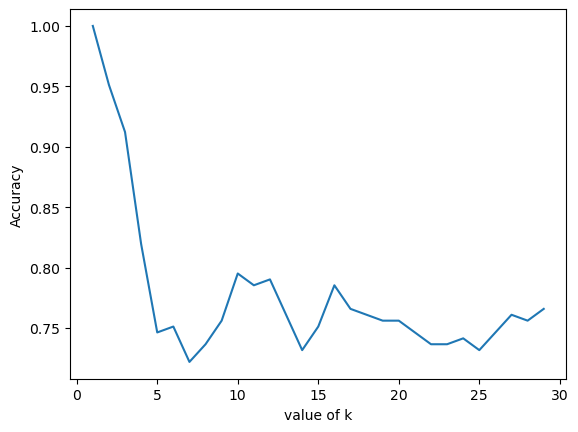

In [25]:
plt.plot(k_range, scores)
plt.xlabel("value of k")
plt.ylabel("Accuracy")


In [26]:
# Provided accuracy values
accuracy_values = [100.00, 95.12, 91.22, 81.95, 74.63, 75.12, 72.20, 73.66, 75.61, 
                   79.51, 78.54, 79.02, 76.10, 73.17, 75.12, 78.54, 76.59, 76.10, 
                   75.61, 75.61, 74.63, 73.66, 73.66, 74.15, 73.17, 74.63, 
                   76.10, 75.61, 76.59]

# Calculate the total accuracy
total_accuracy = sum(accuracy_values)

# Calculate the number of accuracy values
num_values = len(accuracy_values)

# Calculate the average accuracy
average_accuracy = total_accuracy / num_values

print("Average Accuracy:", average_accuracy)

Average Accuracy: 77.78


In [27]:
# taking best k value as 5

model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [28]:
predict_train_knn = (knn_classifier.predict(X_train))
predict_test_knn = (knn_classifier.predict(X_test))

#### implementing Naive bayes classification 

In [29]:
from sklearn.naive_bayes import GaussianNB # library used for modelling naive bayes classification

nb = GaussianNB()
nb.fit(X_train,Y_train)


GaussianNB()

In [30]:
pred_train_nb = (nb.predict(X_train))
pred_test_nb = (nb.predict(X_test))

#### implementing Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


x = X_train
y = Y_train

dt_classifier = DecisionTreeClassifier(random_state=35)
param_grid = {'max_depth': range(1, 11)}  # Try depths from 1 to 10
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(x, y)
print("Best max_depth:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best max_depth: {'max_depth': 10}
Best score: 0.9804878048780488


In [32]:
dt = DecisionTreeClassifier(random_state = 42, max_depth=10)
dt.fit(x,y)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [33]:
pred_train_dt = (dt.predict(X_train))
pred_test_dt = (dt.predict(X_test))

## MODEL EVALUATION

## evaluating knn classifier

###### checking accuracy

In [34]:
# accuracy of training data, test data

accTraining = knn_classifier.score(X_train,Y_train)
accTest = knn_classifier.score(X_test,Y_test)

print("accuracy of training data", accTraining)
print("accuracy of test data", accTest)

accuracy of training data 0.723170731707317
accuracy of test data 0.7658536585365854


###### checking precision, recall_score, f1_score, roc_auc_score of training and test data

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision_train = precision_score(Y_train, predict_train_knn)
precision_test = precision_score(Y_test, predict_test_knn)


print("precision of training data", precision_train)
print("precision of test data", precision_test)

precision of training data 0.7232558139534884
precision of test data 0.7610619469026548


###### checking recall score of training and test data

In [36]:
# Recall is also known as sensitivity or the true positive rate.
# The higher the recall score, the better the machine learning model

recall_train = recall_score(Y_train, predict_train_knn)
recall_test = recall_score(Y_test, predict_test_knn)

print("recall score of training data", recall_train)
print("recall score of test data", recall_test)

recall score of training data 0.7422434367541766
recall score of test data 0.8037383177570093


###### checking f1 score of training and test data

In [37]:
# F1 score is a machine learning evaluation metric that measures a model's accuracy. 
# It combines the precision and recall scores of a model.
# The accuracy metric computes how many times a model made a correct prediction across the entire dataset.

f1_train = f1_score(Y_train, predict_train_knn)
f1_test = f1_score(Y_test, predict_test_knn)

print("f1 score of training data", f1_train)
print("f1 score of test data", f1_test)

f1 score of training data 0.7326266195524146
f1 score of test data 0.7818181818181817


###### checking roc auc score of training and test data 

In [38]:
# The ROC AUC score tells us how efficient the model is.
# The higher the AUC, the better the model's performance

roc_auc_train = roc_auc_score(Y_train, predict_train_knn)
roc_auc_test = roc_auc_score(Y_test, predict_test_knn)

print("roc_auc score of training data", roc_auc_train)
print("roc_auc score of test data", roc_auc_test)

roc_auc score of training data 0.722742666008011
roc_auc score of test data 0.7641140568376883


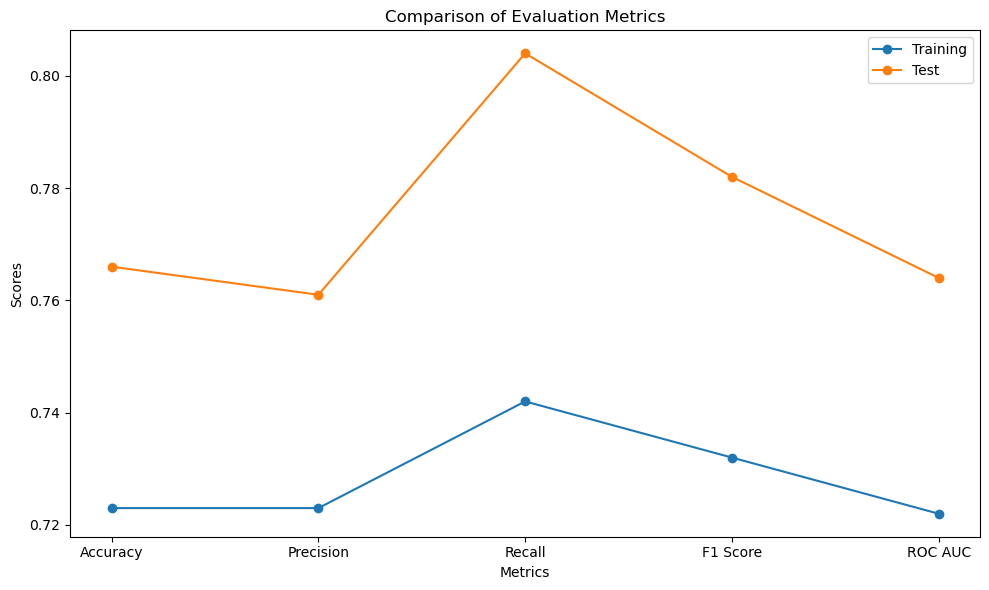

In [39]:
# i evaluated all results or scores here now i want to compare and show to the graph for better observation


import matplotlib.pyplot as plt

# Metrics and their values (replace with your actual values)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
training_scores = [0.723, 0.723, 0.742, 0.732, 0.722]
test_scores = [0.766, 0.761, 0.804, 0.782, 0.764]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot training and test scores
ax.plot(metrics, training_scores, marker='o', label='Training')
ax.plot(metrics, test_scores, marker='o', label='Test')

# Add labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


## evaluating naive bayes classification

###### checking accuracy

In [40]:
accTraining = nb.score(X_train,Y_train)
accTest = nb.score(X_test,Y_test)

print("accuracy of training data", accTraining)
print("accuracy of test data", accTest)

accuracy of training data 0.8207317073170731
accuracy of test data 0.8536585365853658


###### checking precision

In [41]:
precision_train = precision_score(Y_train, pred_train_nb)
precision_test = precision_score(Y_test, pred_test_nb)


print("precision of training data", precision_train)
print("precision of test data", precision_test)

precision of training data 0.8076923076923077
precision of test data 0.8347826086956521


##### checking recall score

In [42]:
recall_train = recall_score(Y_train, pred_train_nb)
recall_test = recall_score(Y_test, pred_test_nb)

print("recall score of training data", recall_train)
print("recall score of test data", recall_test)

recall score of training data 0.8520286396181385
recall score of test data 0.897196261682243


###### checking f1 score

In [43]:
f1_train = f1_score(Y_train, pred_train_nb)
f1_test = f1_score(Y_test, pred_test_nb)

print("f1 score of training data", f1_train)
print("f1 score of test data", f1_test)

f1 score of training data 0.8292682926829269
f1 score of test data 0.8648648648648648


###### checking roc auc score

In [44]:
roc_auc_train = roc_auc_score(Y_train, pred_train_nb)
roc_auc_test = roc_auc_score(Y_test, pred_test_nb)

print("roc_auc score of training data", roc_auc_train)
print("roc_auc score of test data", roc_auc_test)

roc_auc score of training data 0.8200292824025854
roc_auc score of test data 0.8516593553309175


###### comparing all scores for better observations

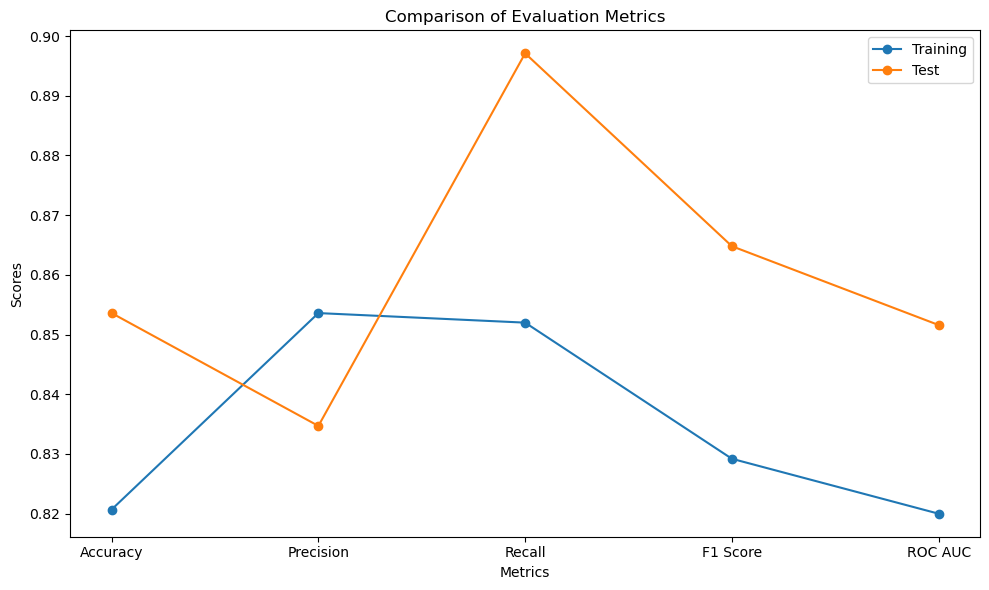

In [45]:
import matplotlib.pyplot as plt

# Metrics and their values (replace with your actual values)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
training_scores = [0.8207, 0.8536, 0.8520, 0.8292, 0.8200]
test_scores = [0.8536, 0.8347, 0.8971, 0.8648, 0.8516]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot training and test scores
ax.plot(metrics, training_scores, marker='o', label='Training')
ax.plot(metrics, test_scores, marker='o', label='Test')

# Add labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

## evaluating decision tree

###### checking accuracy

In [46]:
accTraining = dt.score(X_train,Y_train)
accTest = dt.score(X_test,Y_test)

print("accuracy of training data", accTraining)
print("accuracy of test data", accTest)

accuracy of training data 1.0
accuracy of test data 1.0


###### checking precision

In [47]:
precision_train = precision_score(Y_train, pred_train_dt)
precision_test = precision_score(Y_test, pred_test_dt)


print("precision of training data", precision_train)
print("precision of test data", precision_test)

precision of training data 1.0
precision of test data 1.0


###### checking recall score

In [48]:
recall_train = recall_score(Y_train, pred_train_dt)
recall_test = recall_score(Y_test, pred_test_dt)

print("recall score of training data", recall_train)
print("recall score of test data", recall_test)

recall score of training data 1.0
recall score of test data 1.0


######  checking fi score

In [49]:
f1_train = f1_score(Y_train, pred_train_dt)
f1_test = f1_score(Y_test, pred_test_dt)

print("f1 score of training data", f1_train)
print("f1 score of test data", f1_test)

f1 score of training data 1.0
f1 score of test data 1.0


###### checking roc auc score

In [50]:
roc_auc_train = roc_auc_score(Y_train, pred_train_dt)
roc_auc_test = roc_auc_score(Y_test, pred_test_dt)

print("roc_auc score of training data", roc_auc_train)
print("roc_auc score of test data", roc_auc_test)

roc_auc score of training data 1.0
roc_auc score of test data 1.0


###### comparing all scores for better evaluation

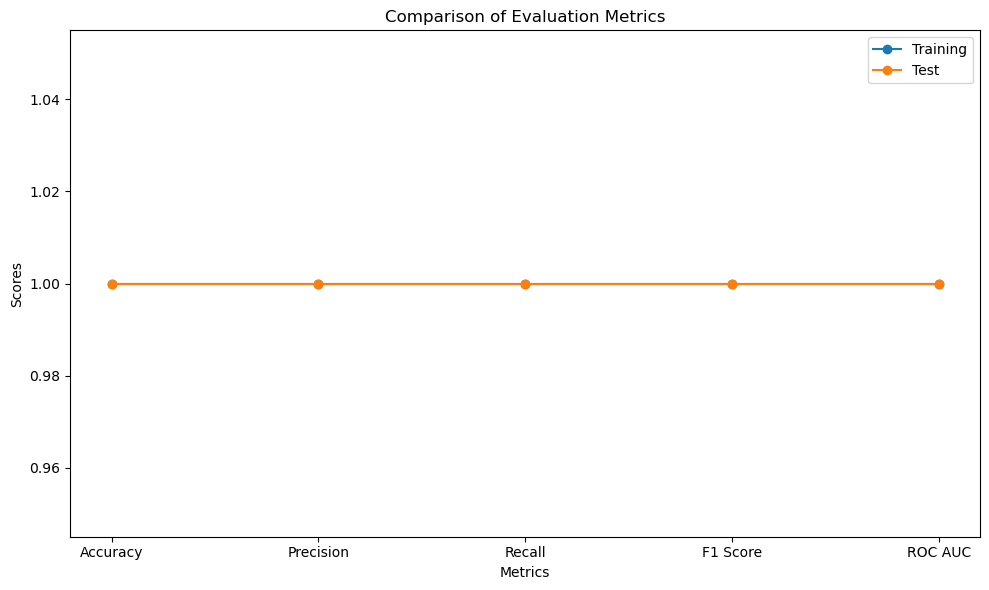

In [51]:
import matplotlib.pyplot as plt

# Metrics and their values (replace with your actual values)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
training_scores = [1.0,1.0,1.0,1.0,1.0]
test_scores = [1.0, 1.0,1.0,1.0,1.0]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot training and test scores
ax.plot(metrics, training_scores, marker='o', label='Training')
ax.plot(metrics, test_scores, marker='o', label='Test')

# Add labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

#### Overfitting and Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score, KFold

###### cross validation on KNN classifier

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier  # Import the model you want to use

# Create or import your feature data (x) and target data (y)
# Make sure x and y are NumPy arrays or Pandas Series

# Create an instance of the model
knn_model = KNeighborsClassifier()  # You can customize this with appropriate hyperparameters

# Perform cross-validation
cross_val_scores = cross_val_score(knn_model, x, y, cv=10)  # Use the correct x and y

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Average accuracy:", cross_val_scores.mean())


Cross-validation scores: [0.74390244 0.74390244 0.69512195 0.68292683 0.62195122 0.59756098
 0.7195122  0.68292683 0.6097561  0.79268293]
Average accuracy: 0.6890243902439025


In [56]:
# similarly for test data

# Create an instance of the model
knn_model = KNeighborsClassifier()  # You can customize this with appropriate hyperparameters

# Perform cross-validation
cross_val_scores = cross_val_score(knn_model, X_test, Y_test, cv=10)  # Use the correct x and y

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Average accuracy:", cross_val_scores.mean())


Cross-validation scores: [0.71428571 0.66666667 0.61904762 0.71428571 0.61904762 0.65
 0.75       0.8        0.75       0.8       ]
Average accuracy: 0.7083333333333333


In [73]:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

# Assuming x and y are your feature and target data
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores
test_score = []
train_score = []

# Perform cross-validation
for train_index, test_index in k_folds.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create an instance of KNeighborsClassifier
    knn = KNeighborsClassifier()
    
    # Fit the model on the training data
    knn.fit(x_train, y_train)
    
    # Make predictions on the train and test data
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    # Calculate the accuracy score for this fold
    accuracy_test = metrics.accuracy_score(y_pred_test, y_test)
    accuracy_train = metrics.accuracy_score(y_pred_train, y_train)
    
    # Store the accuracy score
    test_score.append(accuracy_test)
    train_score.append(accuracy_train)

# Print the accuracy scores for each fold
print("\nTraining Accuracy Scores for Each Fold:")
for fold, score in enumerate(train_score):
    print(f"Fold {fold+1}: {score}")
    
print("\nTesting Accuracy Scores for Each Fold:")
for fold, score in enumerate(test_score):
    print(f"Fold {fold+1}: {score}")

# Calculate and print the average accuracy score
average_accuracy_train = sum(train_score) / len(train_score)
print("\n KNN - Average Accuracy Training Score:", average_accuracy_train)

average_accuracy_test = sum(test_score) / len(test_score)
print(" KNN - Average Accuracy Testing Score:", average_accuracy_test)



Training Accuracy Scores for Each Fold:
Fold 1: 0.8861788617886179
Fold 2: 0.8631436314363143
Fold 3: 0.8753387533875339
Fold 4: 0.8848238482384824
Fold 5: 0.8875338753387534
Fold 6: 0.8766937669376694
Fold 7: 0.8861788617886179
Fold 8: 0.9010840108401084
Fold 9: 0.8807588075880759
Fold 10: 0.8658536585365854

Testing Accuracy Scores for Each Fold:
Fold 1: 0.7439024390243902
Fold 2: 0.5975609756097561
Fold 3: 0.7439024390243902
Fold 4: 0.6829268292682927
Fold 5: 0.6463414634146342
Fold 6: 0.6707317073170732
Fold 7: 0.6707317073170732
Fold 8: 0.7804878048780488
Fold 9: 0.7073170731707317
Fold 10: 0.5853658536585366

 KNN - Average Accuracy Training Score: 0.8807588075880759
 KNN - Average Accuracy Testing Score: 0.6829268292682926


###### for naive bayes algorithms


In [71]:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

# Assuming x and y are your feature and target data
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores
test_score = []
train_score = []

# Perform cross-validation
for train_index, test_index in k_folds.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create an instance of Naive Bayes
    nb = GaussianNB()
    
    # Fit the model on the training data
    nb.fit(x_train, y_train)
    
    # Make predictions on the train and test data
    y_pred_test = nb.predict(x_test)
    y_pred_train = nb.predict(x_train)
    
    # Calculate the accuracy score for this fold
    accuracy_test = metrics.accuracy_score(y_pred_test, y_test)
    accuracy_train = metrics.accuracy_score(y_pred_train, y_train)
    
    # Store the accuracy score
    test_score.append(accuracy_test)
    train_score.append(accuracy_train)

# Print the accuracy scores for each fold
print("\nNaive Bayes - Training Accuracy Scores for Each Fold:")
for fold, score in enumerate(train_score):
    print(f"Fold {fold+1}: {score}")
    
print("\nNaive Bayes - Testing Accuracy Scores for Each Fold:")
for fold, score in enumerate(test_score):
    print(f"Fold {fold+1}: {score}")

# Calculate and print the average accuracy score
average_accuracy_train = sum(train_score) / len(train_score)
print("\nNaive Bayes - Average Accuracy Training Score:", average_accuracy_train)

average_accuracy_test = sum(test_score) / len(test_score)
print("Naive Bayes - Average Accuracy Testing Score:", average_accuracy_test)



Naive Bayes - Training Accuracy Scores for Each Fold:
Fold 1: 0.8197831978319783
Fold 2: 0.8211382113821138
Fold 3: 0.8252032520325203
Fold 4: 0.8211382113821138
Fold 5: 0.8252032520325203
Fold 6: 0.8238482384823849
Fold 7: 0.8252032520325203
Fold 8: 0.8211382113821138
Fold 9: 0.8184281842818428
Fold 10: 0.8157181571815718

Naive Bayes - Testing Accuracy Scores for Each Fold:
Fold 1: 0.8048780487804879
Fold 2: 0.7804878048780488
Fold 3: 0.7804878048780488
Fold 4: 0.8048780487804879
Fold 5: 0.7682926829268293
Fold 6: 0.8780487804878049
Fold 7: 0.8048780487804879
Fold 8: 0.8780487804878049
Fold 9: 0.8414634146341463
Fold 10: 0.8414634146341463

Naive Bayes - Average Accuracy Training Score: 0.821680216802168
Naive Bayes - Average Accuracy Testing Score: 0.8182926829268293


In [72]:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

# Assuming x and y are your feature and target data
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores
test_score = []
train_score = []

# Perform cross-validation
for train_index, test_index in k_folds.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create an instance of Decision Tree
    dt = DecisionTreeClassifier()
    
    # Fit the model on the training data
    dt.fit(x_train, y_train)
    
    # Make predictions on the train and test data
    y_pred_test = dt.predict(x_test)
    y_pred_train = dt.predict(x_train)
    
    # Calculate the accuracy score for this fold
    accuracy_test = metrics.accuracy_score(y_pred_test, y_test)
    accuracy_train = metrics.accuracy_score(y_pred_train, y_train)
    
    # Store the accuracy score
    test_score.append(accuracy_test)
    train_score.append(accuracy_train)

# Print the accuracy scores for each fold
print("\nDecision Tree - Training Accuracy Scores for Each Fold:")
for fold, score in enumerate(train_score):
    print(f"Fold {fold+1}: {score}")
    
print("\nDecision Tree - Testing Accuracy Scores for Each Fold:")
for fold, score in enumerate(test_score):
    print(f"Fold {fold+1}: {score}")

# Calculate and print the average accuracy score
average_accuracy_train = sum(train_score) / len(train_score)
print("\nDecision Tree - Average Accuracy Training Score:", average_accuracy_train)

average_accuracy_test = sum(test_score) / len(test_score)
print("Decision Tree - Average Accuracy Testing Score:", average_accuracy_test)



Decision Tree - Training Accuracy Scores for Each Fold:
Fold 1: 1.0
Fold 2: 1.0
Fold 3: 1.0
Fold 4: 1.0
Fold 5: 1.0
Fold 6: 1.0
Fold 7: 1.0
Fold 8: 1.0
Fold 9: 1.0
Fold 10: 1.0

Decision Tree - Testing Accuracy Scores for Each Fold:
Fold 1: 1.0
Fold 2: 1.0
Fold 3: 1.0
Fold 4: 0.975609756097561
Fold 5: 0.9146341463414634
Fold 6: 1.0
Fold 7: 1.0
Fold 8: 0.9878048780487805
Fold 9: 0.9878048780487805
Fold 10: 0.9878048780487805

Decision Tree - Average Accuracy Training Score: 1.0
Decision Tree - Average Accuracy Testing Score: 0.9853658536585368
